# Cluster Level Example Analysis

This notebook demonstrates various analyses you can perform with the dataset we're releasing. It shows how to explore the data structure, visualize key distributions, and identify patterns in the results.

## Data Loading and Initial Exploration

The first step is to load the TSV file and explore its basic structure. This helps us understand the data dimensions, column names, and get a sense of the values contained in each field.

We import the necessary libraries for creating our visualizations. We'll use matplotlib to generate insightful plots that help us understand the data better.

In [1]:
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt

# Load and explore the TSV file
df = pd.read_csv('cluster_level_dataset.tsv', sep='\t') 

# Display basic information
print(f"Shape of dataframe: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

# Summary statistics for numeric columns
print("\nSummary statistics:")
display(df.describe())


Shape of dataframe: (630, 16)

First 5 rows:


,cluster_name_0,cluster_description_0,cluster_name_1,cluster_description_1,cluster_name_2,cluster_description_2,percent_records,percent_users,onet_task,collaboration:directive_ratio,collaboration:feedback loop_ratio,collaboration:learning_ratio,collaboration:none_ratio,collaboration:task iteration_ratio,collaboration:validation_ratio,has_thinking_ratio
0,Improve financial document translations with p...,Users requested optimization of financial tran...,Translate documents and texts between languages,Users requested assistance with translating v...,Translate documents and texts between languages,Users requested assistance with translating v...,0.102149,0.097080,Compile terminology and information to be used...,0.815348,NaN,0.028777,0.124700,0.025180,NaN,NaN
1,Categorize documents using predefined topic hi...,The user requested assistance with assigning r...,Analyze and classify content according to spec...,"Users requested assistance with analyzing, cat...",Develop data analysis and visualization system...,"These clusters focused on developing tools, sy...",0.118015,0.117656,Design information storage and retrieval syste...,0.962672,NaN,NaN,NaN,NaN,NaN,NaN
2,Reply with a specific word or short text,Users requested the assistant to respond with...,Generate creative names or provide short text ...,Users requested assistance with generating cre...,Create or improve brand visuals and creative t...,Users requested assistance with visual brand e...,0.096294,0.095778,Perform routine system administrative function...,0.921011,NaN,0.025276,0.045814,NaN,NaN,NaN
3,Help rename or modify names while preserving c...,Users requested assistance with renaming or m...,Help organize and structure digital content an...,These clusters were focused on organizing and ...,Help implement digital file systems and automa...,Users requested technical assistance with imp...,0.141876,0.139371,Develop and document database architectures.,0.498322,0.112416,0.125839,0.028523,0.219799,NaN,0.026846
4,Provide guidance on marriage and divorce legal...,The collection of statements requested informa...,Explain legal concepts and provide guidance on...,"Users requested explanations, analysis, and gu...",Provide legal information and document draftin...,Users sought guidance on legal matters includ...,0.089653,0.090953,Advise clients concerning business transaction...,0.218000,0.030000,0.500000,NaN,0.204000,NaN,NaN



Summary statistics:


,percent_records,percent_users,collaboration:directive_ratio,collaboration:feedback loop_ratio,collaboration:learning_ratio,collaboration:none_ratio,collaboration:task iteration_ratio,collaboration:validation_ratio,has_thinking_ratio
count,630.000000,630.000000,630.000000,583.000000,625.000000,531.000000,618.000000,555.000000,601.000000
mean,0.158730,0.158730,0.285240,0.138246,0.284888,0.035206,0.237599,0.042935,0.049959
std,0.035583,0.034546,0.137421,0.131274,0.181525,0.066708,0.129608,0.061945,0.026419
min,0.084274,0.085151,0.029423,0.006277,0.005887,0.005486,0.009351,0.005622,0.006198
25%,0.133886,0.134275,0.198867,0.032888,0.136585,0.017390,0.146893,0.019843,0.029208
50%,0.153572,0.155415,0.266359,0.093904,0.266098,0.022291,0.219638,0.027748,0.045323
75%,0.182567,0.181401,0.339512,0.210889,0.404255,0.031310,0.305826,0.044705,0.064413
max,0.251956,0.247877,0.992585,0.651877,0.912515,0.885842,0.664309,0.812616,0.168623


## Most Common Level 2 Clusters

This visualization shows the most common Level 2 Clusters (more abstracted layer of granularity) in terms of percentage of records

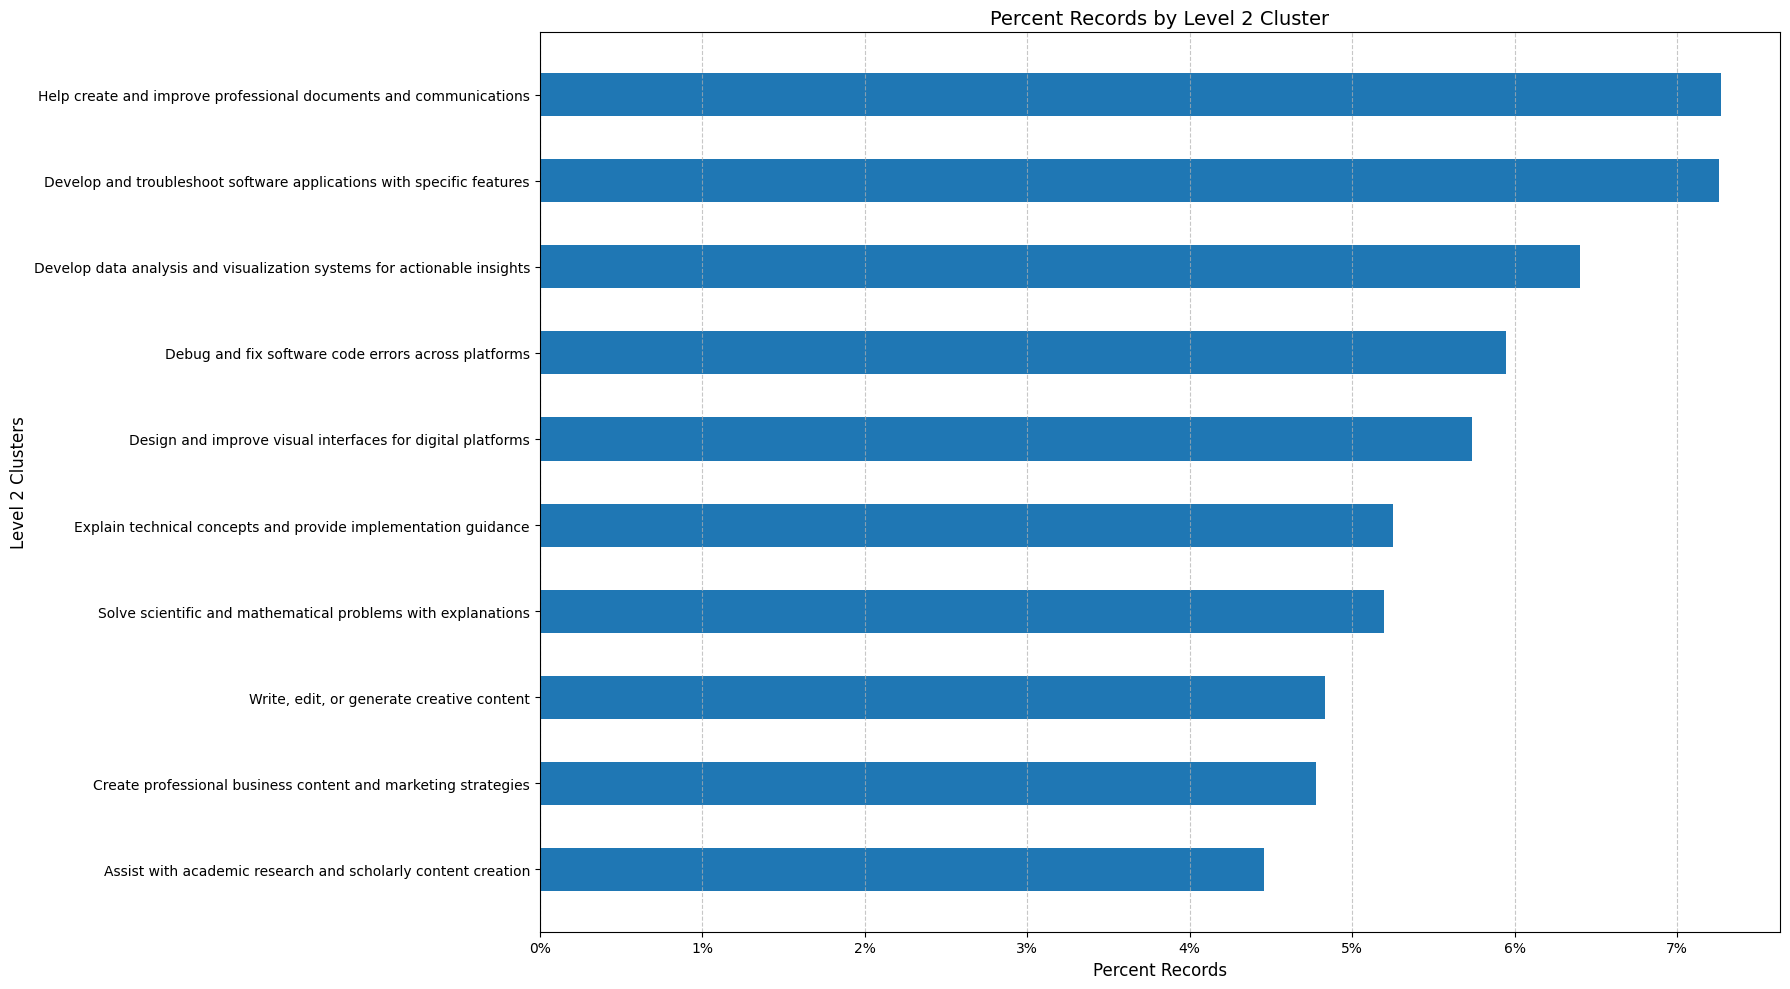

In [2]:
fig, ax = plt.subplots(figsize=(18, 10))  # Create figure and axes objects explicitly
cluster_data = df.groupby('cluster_name_2')['percent_records'].sum().sort_values(ascending=False).head(10)

cluster_data = cluster_data.iloc[::-1]  


# Create horizontal bar chart with explicit axes
bars = ax.barh(cluster_data.index, cluster_data.values, height=0.5) 

# Set title and labels
ax.set_title('Percent Records by Level 2 Cluster', fontsize=14)
ax.set_xlabel('Percent Records', fontsize=12)
ax.set_ylabel('Level 2 Clusters', fontsize=12)

# Format x-axis to show percentages with no decimal places
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

# Adjust margins and layout
plt.subplots_adjust(left=0.3, right=0.95, top=0.9, bottom=0.15)

# Increase font size for y-axis labels
ax.tick_params(axis='y', labelsize=10)

# Add grid lines for easier reading
ax.xaxis.grid(True, linestyle='--', alpha=0.7)



plt.tight_layout()
plt.show()


## Task Iteration Ratio Analysis

This visualization shows the Level 0 clusters with the highest Task Iteration ratios. Directive ratio indicates what percent collaboration patterns for that cluster was 'Task Iteration' (a subtype of Augmentative according to our framework).

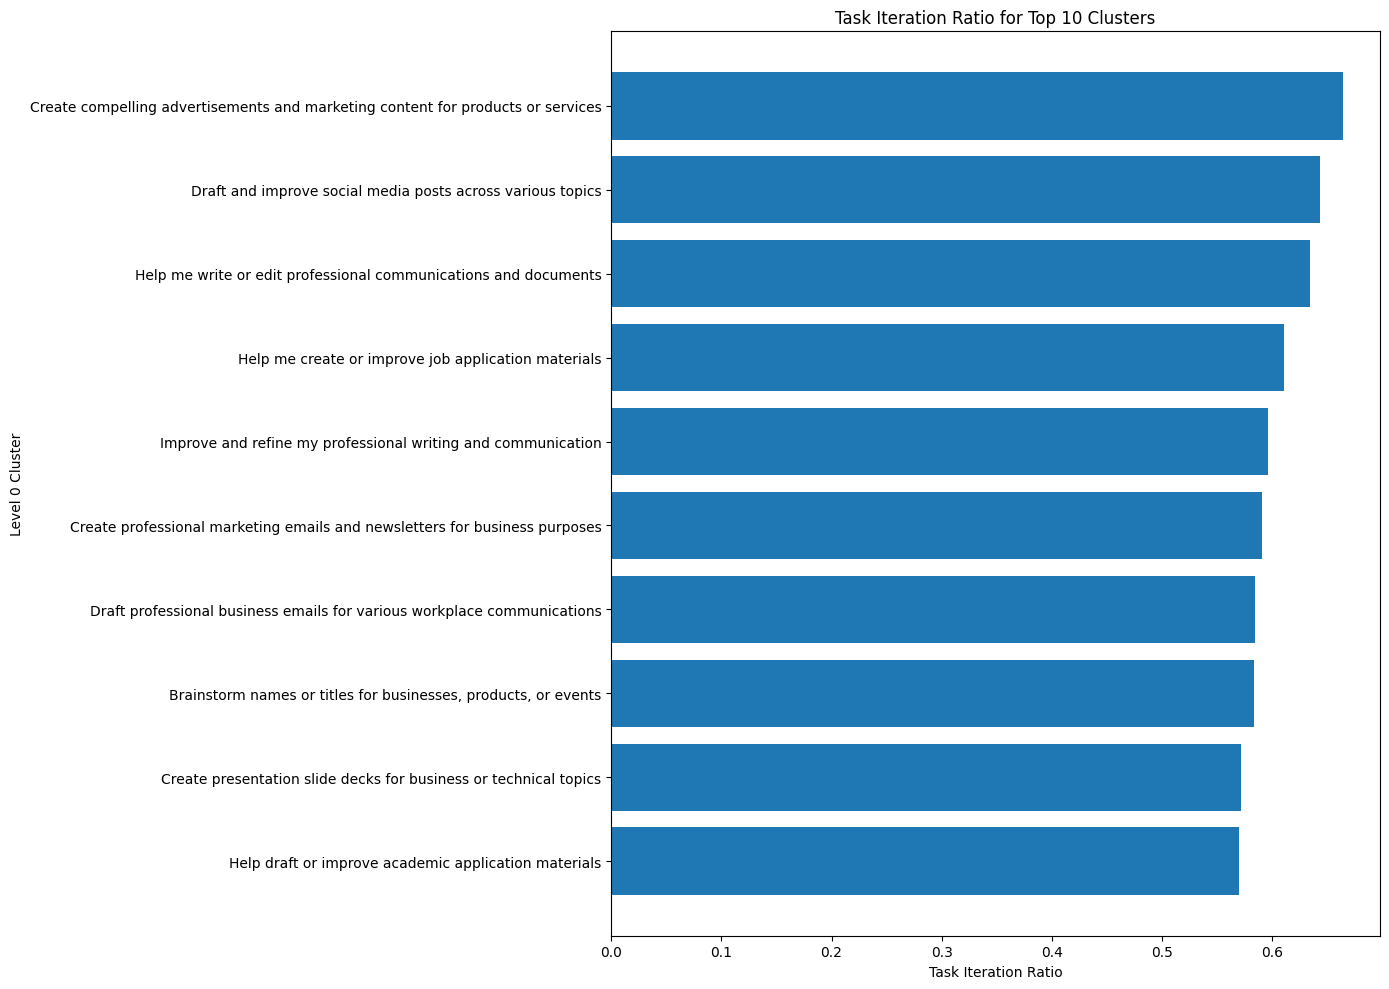

In [3]:
# Sort by directive ratio descending and flip the order of the chart
plt.figure(figsize=(14, 10))

top_directive_df = df.sort_values(by = 'collaboration:task iteration_ratio', ascending=False).head(10)

# Reverse the order for more intuitive graph
top_directive_df = top_directive_df.iloc[::-1]  

# Create the plot
ax = plt.barh(top_directive_df['cluster_name_0'], top_directive_df['collaboration:task iteration_ratio'])
plt.title('Task Iteration Ratio for Top 10 Clusters')
plt.xlabel('Task Iteration Ratio')
plt.ylabel('Level 0 Cluster')

# Format the y-axis labels to be more readable
plt.tight_layout()
plt.show()